In [1]:
import os
import json
import glob
import copy
import copy
import itertools
import pprint 
pp = pprint.PrettyPrinter(indent=4)

import numpy as np
import pylab as pl
import seaborn as sns
import pandas as pd
import statsmodels as sm
import cPickle as pkl

from scipy import stats as spstats

#from pipeline.python.retinotopy import fit_2d_rfs as fitrf
#from pipeline.python.retinotopy import convert_coords as coords

from pipeline.python.classifications import experiment_classes as util
#from pipeline.python.classifications import retino_structure as ret
from pipeline.python.classifications import aggregate_data_stats as aggr
#from pipeline.python.classifications import rf_utils as rfutils

from pipeline.python import utils as putils #.utils import natural_keys, label_figure, convert_range

from matplotlib.lines import Line2D



In [2]:
%matplotlib notebook

In [3]:
reload(aggr)

<module 'pipeline.python.classifications.aggregate_data_stats' from '/home/julianarhee/Repositories/2p-pipeline/pipeline/python/classifications/aggregate_data_stats.pyc'>

# Colors

In [4]:
# visual_areas = ['V1', 'Lm', 'Li']
# colors = ['k', 'royalblue', 'darkorange'] #sns.color_palette(palette='colorblind') #, n_colors=3)
# area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}
visual_areas = ['V1', 'Lm', 'Li']
colors = ['magenta', 'orange', 'dodgerblue'] #sns.color_palette(palette='colorblind') #, n_colors=3)
area_colors = {'V1': colors[0], 'Lm': colors[1], 'Li': colors[2]}

#### Plot params
pl.rcParams["axes.labelsize"] = 16
pl.rcParams["xtick.labelsize"] = 12
pl.rcParams["ytick.labelsize"] = 12

dpi = 150

# Dataset info

In [6]:
#### Set trace ID and FOV/state type
traceid = 'traces001'
fov_type = 'zoom2p0x'
state = 'awake'
aggregate_dir = '/n/coxfs01/julianarhee/aggregate-visual-areas'

#### Preprocessing params
responsive_test = 'ROC' #None
responsive_thr = 0.05 #None
n_stds = None

#### RF fit params
response_type = 'corrected'
# fit_thr=0.5

#### Set outputdir for current analysis
#fit_desc = fitrf.get_fit_desc(response_type=response_type)
# outdir = os.path.join(aggregate_dir, 'receptive-fields', '%s__%s' % (traceid, fit_desc))
# if not os.path.exists(outdir):
#     os.makedirs(outdir)
# print("... saving output to base dir:\n%s" % outdir)

response_str = '%s_resptest-%s_respthr-%.2f' % (response_type, responsive_test, responsive_thr) 

In [7]:
#### Create data ID for labeling figures with data-types
experiment = 'blobs'

filter_by = 'first'

if experiment=='blobs':
    has_gratings=False
    g_str = 'hasgratings' if has_gratings else 'blobsonly'
else:
    g_str = 'gratingsonly'
filter_str = 'filter-dsets-%s-%s_%s' % (filter_by, g_str, response_str)


In [8]:
#### Create data ID for labeling figures with data-types
data_id = '|'.join([traceid, filter_str])
print(data_id)


traces001|filter-dsets-first-blobsonly_corrected_resptest-ROC_respthr-0.05


In [9]:
#### Output dir
stats_dir = os.path.join(aggregate_dir, 'data-stats')

In [10]:
# Get all data sets
sdata = aggr.get_aggregate_info(traceid=traceid, fov_type=fov_type, state=state)

In [11]:
sdata.groupby(['visual_area', 'animalid', 'session', 'fov']).count()

experiment  fovnum
visual_area animalid session  fov                              
Li          JC076    20190422 FOV1_zoom2p0x           2       2
                     20190502 FOV1_zoom2p0x           2       2
            JC080    20190602 FOV1_zoom2p0x           2       2
            JC089    20190522 FOV1_zoom2p0x           4       4
            JC090    20190605 FOV1_zoom2p0x           4       4
            JC091    20190602 FOV1_zoom2p0x           5       5
                     20190606 FOV1_zoom2p0x           4       4
                     20190607 FOV1_zoom2p0x           4       4
                     20190614 FOV1_zoom2p0x           4       4
                     20191007 FOV1_zoom2p0x           2       2
                     20191008 FOV1_zoom2p0x           4       4
            JC092    20190527 FOV2_zoom2p0x           1       1
                              FOV3_zoom2p0x           3       3
                     20190528 FOV1_zoom2p0x           2       2
            JC099    20190609 FOV1_zoom2p0x           4       4
                     20190612 FOV1_zoom2p0x           4       4
                     20190617 FOV1_zoom2p0x           4       4
            JC111    20191003 FOV1_zoom2p0x           2       2
            JC113    20191012 FOV1_zoom2p0x           2       2
                              FOV2_zoom2p0x           2       2
                     20191017 FOV1_zoom2p0x           3       3
                     20191018 FOV1_zoom2p0x           4       4
            JC117    20191104 FOV1_zoom2p0x           2       2
                     20191105 FOV1_zoom2p0x           4       4
            JC120    20191106 FOV1_zoom2p0x           2       2
                     20191111 FOV1_zoom2p0x           4       4
Lm          JC076    20190423 FOV1_zoom2p0x           2       2
            JC078    20190430 FOV1_zoom2p0x           3       3
                     20190504 FOV1_zoom2p0x           3       3
                     20190509 FOV1_zoom2p0x           3       3
...                                                 ...     ...
            JC083    20190517 FOV1_zoom2p0x           6       6
            JC084    20190525 FOV1_zoom2p0x           4       4
            JC091    20190627 FOV1_zoom2p0x           4       4
            JC097    20190615 FOV3_zoom2p0x           1       1
                     20190618 FOV1_zoom2p0x           5       5
            JC110    20191004 FOV3_zoom2p0x           2       2
                              FOV4_zoom2p0x           1       1
            JC113    20191012 FOV3_zoom2p0x           2       2
                     20191108 FOV1_zoom2p0x           2       2
            JC117    20191104 FOV2_zoom2p0x           2       2
                     20191111 FOV2_zoom2p0x           2       2
            JC120    20191106 FOV4_zoom2p0x           1       1
V1          JC076    20190420 FOV1_zoom2p0x           3       3
                     20190501 FOV1_zoom2p0x           3       3
            JC083    20190507 FOV1_zoom2p0x           3       3
                     20190510 FOV1_zoom2p0x           3       3
                     20190511 FOV1_zoom2p0x           4       4
            JC084    20190522 FOV1_zoom2p0x           4       4
            JC085    20190622 FOV1_zoom2p0x           5       5
            JC097    20190613 FOV1_zoom2p0x           5       5
                     20190615 FOV1_zoom2p0x           1       1
                              FOV2_zoom2p0x           2       2
                     20190616 FOV1_zoom2p0x           5       5
                     20190617 FOV1_zoom2p0x           4       4
            JC110    20191004 FOV1_zoom2p0x           1       1
                              FOV2_zoom2p0x           2       2
                     20191006 FOV1_zoom2p0x           5       5
            JC113    20191108 FOV2_zoom2p0x           2       2
            JC117    20191111 FOV1_zoom2p0x           2       2
            JC120    20191106 FOV3_zoom2p0x           1       1

[66 rows x 2

In [12]:
# Get blob metadata only - and only if have RFs
sdata_exp = pd.concat([g for k, g in sdata.groupby(['animalid', 'session', 'fov']) if 
                        experiment in g['experiment'].values 
                         and ('rfs' in g['experiment'].values or 'rfs10' in g['experiment'].values)])

sdata_exp[['visual_area', 'animalid', 'session', 'fov']].drop_duplicates().groupby(['visual_area']).count()

,animalid,session,fov
visual_area,,,
Li,13,13,13
Lm,12,12,12
V1,11,11,11


In [13]:
# Drop duplicates and whatnot fovs
if experiment=='blobs':
    exp_dkeys = aggr.get_blob_datasets(filter_by=filter_by, has_gratings=has_gratings, as_dict=True)
elif experiment == 'gratings':
    exp_dkeys = aggr.get_gratings_datasets(filter_by=filter_by, as_dict=True)

for k, v in exp_dkeys.items():
    print('%s: %i datasets' % (k, len(v)))

dictkeys = [d for d in list(itertools.chain(*exp_dkeys.values()))]
full_datakeys = ['%s_%s_fov%i' % (s.split('_')[0], s.split('_')[1], 
                   sdata[(sdata['animalid']==s.split('_')[1]) & (sdata['session']==s.split('_')[0])]['fovnum'].unique()[0]) for s in dictkeys]
expmeta = dict((k, [dv for dv in full_datakeys for vv in v if vv in dv]) for k, v in exp_dkeys.items())

V1: 8 datasets
Lm: 8 datasets
Li: 9 datasets


In [14]:
expmeta

{'Li': ['20190605_JC090_fov1',
  '20190617_JC099_fov1',
  '20191018_JC113_fov1',
  '20191105_JC117_fov1',
  '20191111_JC120_fov1',
  '20190602_JC091_fov1',
  '20190606_JC091_fov1',
  '20190609_JC099_fov1',
  '20190502_JC076_fov1'],
 'Lm': ['20190525_JC084_fov1',
  '20190627_JC091_fov1',
  '20190618_JC097_fov1',
  '20190512_JC083_fov1',
  '20190504_JC078_fov1',
  '20190430_JC078_fov1',
  '20190506_JC080_fov1',
  '20190508_JC083_fov1'],
 'V1': ['20190522_JC084_fov1',
  '20190622_JC085_fov1',
  '20190613_JC097_fov1',
  '20190616_JC097_fov1',
  '20190617_JC097_fov1',
  '20191006_JC110_fov1',
  '20190420_JC076_fov1',
  '20190507_JC083_fov1']}

In [15]:
def melt_square_matrix(df, metric_name='value', include_diagonal=False):
    
    k = 0 if include_diagonal else 1
    df = df.where(np.triu(np.ones(df.shape), k=k).astype(np.bool))

    df = df.stack().reset_index()
    df.columns=['row', 'col', metric_name]
    return df

In [16]:
from scipy import interpolate
def resample_traces(samples, in_rate=44.65, out_rate=20.0):

    n_in_samples= len(samples)
    in_samples = samples.copy() #[rid, :] #np.array(tracef['File%03d' % curr_file][trace_type][:])
    in_tpoints = np.arange(0, n_in_samples) #len(in_samples))

    n_out_samples = round(n_in_samples * out_rate/in_rate)
    #print("N out samples: %i" % n_out_samples)

    flinear = interpolate.interp1d(in_tpoints, in_samples, axis=0)

    out_tpoints = np.linspace(in_tpoints[0], in_tpoints[-1], n_out_samples)
    out_samples = flinear(out_tpoints)
    #print("Out samples:", out_samples.shape)
    
    return out_tpoints, out_samples


# Test 1 dataset

In [17]:
animalid = 'JC084'
session = '20190522'
fovnum = 1


In [18]:
print(response_type)

corrected


In [19]:
traces, labels, sdf = aggr.load_traces(animalid, session, fovnum, experiment, traceid=traceid, 
                                       response_type=response_type,
                                      responsive_test=responsive_test, 
                                       responsive_thr=responsive_thr, n_stds=n_stds)
trialmeans = aggr.traces_to_trials(traces, labels, epoch='stimulus')

datakey = '_'.join([session, animalid, 'fov%i' % fovnum])

Creating blobs object [JC084|20190522|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (corrected).
... updating self
... getting responsive cells (test: ROC, thr: 0.05')
... loading stats
107 of 260 cells responsive


In [20]:
trialbas = aggr.traces_to_trials(traces, labels, epoch='baseline')


<IPython.core.display.Javascript object>


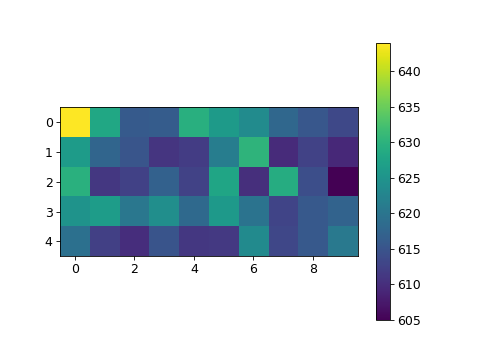

In [21]:
rid=39
tm = trialmeans.groupby(['config']).mean()[rid].reshape(10,5).T
pl.figure()
pl.imshow(tm)
pl.colorbar()

<IPython.core.display.Javascript object>


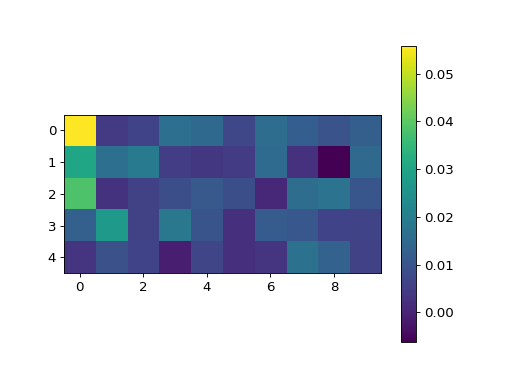

In [75]:
rid=39
tm = trialmeans.groupby(['config']).mean()[rid].reshape(10,5).T
pl.figure()
pl.imshow(tm)
pl.colorbar()

In [22]:
trialbas.mean()

1      578.971052
5      593.833954
9      637.398890
10     626.342972
14     647.325534
17     653.277720
18     637.393411
19     628.365700
21     606.855740
25     626.699353
26     611.109943
27     627.259999
31     639.652835
35     606.297910
36     599.680850
39     612.160694
40     599.440046
42     590.010812
43     630.746547
44     688.166695
46     651.107558
49     679.330848
51     672.638880
53     665.951525
54     698.920485
57     661.079058
59     659.728543
60     652.253307
61     641.036191
63     668.745335
          ...    
168    661.104281
170    659.156911
171    648.971959
175    654.627630
177    664.034028
184    615.856882
190    691.325935
191    693.535384
193    712.372145
203    709.501571
207    653.790614
209    665.443995
211    670.633085
212    657.306296
214    606.394222
215    628.451586
216    757.292425
217    613.342480
222    651.665753
230    679.812660
231    676.276942
233    702.839857
234    672.783119
239    638.433662
241    684

In [23]:
#rlist = [t for t in trial_means.columns if putils.isnumber(t)]
#min_val = min([trial_means[rlist].min().min(), trial_bas[rlist].min().min()])

#trial_means[rlist] = trial_means[rlist]-min_val
#trial_bas[rlist] = trial_bas[rlist]-min_val

variance_x_reps = trialmeans.groupby(['config']).var()
means_x_reps = trialmeans.groupby(['config']).mean()

variance_x_reps_bas = trialbas.groupby(['config']).var()
means_x_reps_bas = trialbas.groupby(['config']).mean()


d1 = variance_x_reps.unstack().reset_index().rename(columns={0: 'variance', 'level_0': 'rid'}).reset_index(drop=True)
d2 = means_x_reps.unstack().reset_index().rename(columns={0: 'mean', 'level_0': 'rid'}).reset_index(drop=True)

d1_y = variance_x_reps_bas.unstack().reset_index().rename(columns={0: 'variance_bas', 'level_0': 'rid'}).reset_index(drop=True)
d2_y = means_x_reps_bas.unstack().reset_index().rename(columns={0: 'mean_bas', 'level_0': 'rid'}).reset_index(drop=True)

d1['rel_var'] = d1['variance'].values/d1_y['variance_bas'].values
d2['rel_mean'] = d2['mean'].values/d2_y['mean_bas'].values

vardf = pd.merge(d1, d2)



<IPython.core.display.Javascript object>


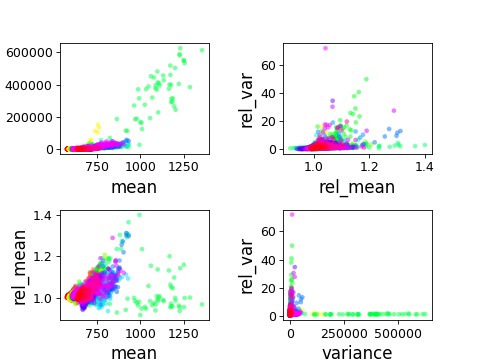

In [24]:
fig, axn = pl.subplots(2,2)
ax=axn[0,0]
sns.scatterplot(x='mean', y='variance', hue='rid', palette='hsv', data=vardf, ax=ax,
               marker='o', s=20, edgecolor='none', alpha=0.5, legend=0)

ax=axn[0,1]
sns.scatterplot(x='rel_mean', y='rel_var', hue='rid', palette='hsv', data=vardf, ax=ax,
               marker='o', s=20, edgecolor='none', alpha=0.5, legend=0)

ax=axn[1,0]
sns.scatterplot(x='mean', y='rel_mean', hue='rid', palette='hsv', data=vardf, ax=ax,
               marker='o', s=20, edgecolor='none', alpha=0.5, legend=0)

ax=axn[1,1]
sns.scatterplot(x='variance', y='rel_var', hue='rid', palette='hsv', data=vardf, ax=ax,
               marker='o', s=20, edgecolor='none', alpha=0.5, legend=0)

pl.subplots_adjust(hspace=0.5, wspace=0.5)


<IPython.core.display.Javascript object>


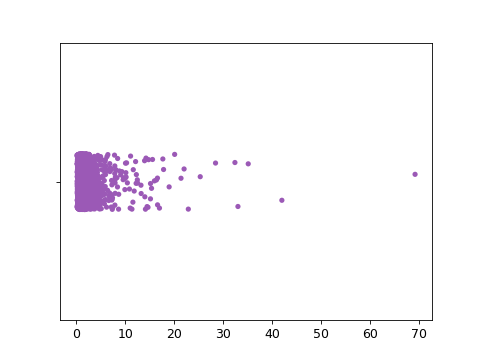

In [27]:
fig, ax = pl.subplots()
sns.stripplot(vardf['rel_var']/vardf['rel_mean'])

# Downsample, calculate activity correlations

In [28]:
# Temporal binning params
n_frames_bin = 11.
framerate = 44.65
new_framerate = framerate/n_frames_bin
print("Downsampled fr: %.2f Hz" % new_framerate)

# Pupil alignment params
#pre_ITI_ms=500
#post_ITI_ms=500 #pre_ITI_ms
#epoch='trial_alignment'

#### Get indices of trial epochs to model
#pre_flank = round((pre_ITI_ms/1E3)*44.65) #n_on/2.
#post_flank = round((post_ITI_ms/1E3)*44.65)  #n_on


Downsampled fr: 4.06 Hz


In [29]:
params = {'n_frames_bin': n_frames_bin,
          'framerate': framerate,
          'stim_on_frame': stim_on,
          'n_frames_on': n_on,
          'nframes_per_trial': nframes_per_trial}
params.update({'ds_framerate': new_framerate,
               'ds_nframes_per_trial': int(df.groupby(['trial'])['frame_ix'].count().unique()),
               'ds_n_frames_on':  new_n_on,
               'ds_stim_on_frame': new_stim_on})

NameError: name 'stim_on' is not defined

In [30]:
#### Get trial epochs
stim_on = float(labels['stim_on_frame'].unique())
n_on = float(labels['nframes_on'].unique())
nframes_per_trial = labels.groupby(['trial']).count().iloc[0][0]

#### Get indices of trial epochs to model
start_ix = 0 #int(stim_on-pre_flank)
end_ix = nframes_per_trial #int(stim_on + n_on + post_flank + 1)
#print(start_ix, end_ix, end_ix-start_ix)

#### Get resampled indices of trial epochs
_, out_ixs = resample_traces(np.arange(start_ix, end_ix), in_rate=44.65, out_rate=new_framerate)
new_stim_on = int(np.where(abs(out_ixs-stim_on) == min(abs(out_ixs-stim_on)))[0])
new_n_on = int(round(n_on / 2.))

#### Get sample roi trace for dims
roi_list = traces.columns.tolist()


#roi_traces=[]
r_list=[]
for rid in roi_list:
    
    # Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
    trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                            index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
    configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
    #included_trials = [trial for trial, tg in labels.groupby(['trial'])]

    #### Bin traces - Each tbin is a column, each row is a sample 
    sample_data = trialmat.fillna(method='pad').copy()
    binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
    n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

    #### Zscore traces 
    zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

    # Reshape roi traces
    cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
    r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
    r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
    r_['config'] = cfg_list

    r_list.append(r_)
    
df = pd.concat(r_list, axis=1)
_, i = np.unique(df.columns, return_index=True)
df = df.iloc[:, i]

In [31]:
int(df.groupby(['trial'])['frame_ix'].count().unique())


13

<IPython.core.display.Javascript object>


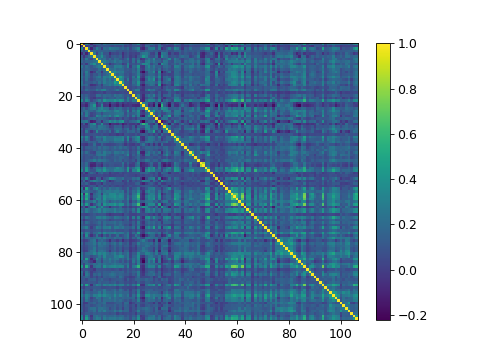

In [32]:
pl.figure()
pl.imshow(df[roi_list].corr())
pl.colorbar()

In [33]:
rid = 5 #39 #roi_list[0]

# Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                        index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
included_trials = [trial for trial, tg in labels.groupby(['trial'])]


#### Bin traces - Each tbin is a column, each row is a sample 
sample_data = trialmat.fillna(method='pad').copy()
binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

#### Zscore traces 
zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

# Reshape roi traces
cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
r_['config'] = cfg_list


In [34]:
# Check with known config, known RID
ml=53 #-1
sz=10
print(sdf[(sdf['morphlevel']==ml) & (sdf['size']==sz)])
cfg = sdf[(sdf['morphlevel']==ml) & (sdf['size']==sz)].index[0]
trial_ixs = np.array([int(t[5:]) for t in labels[labels['config']==cfg]['trial'].unique()])

          color morphlevel   object  size stimtype xpos ypos yrot
config026               53  morph53  10.0    image   20   -8    0


<IPython.core.display.Javascript object>


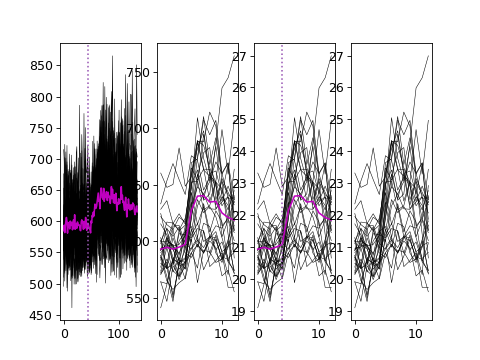

In [35]:
fig, axn = pl.subplots(1, 4)
ax=axn[0]
ax.plot(trialmat.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(trialmat.loc[trial_ixs].values.T, axis=1), 'm')
ax.axvline(x=stim_on, ls=':')

ax=axn[1]
ax.plot(binned_trialmat.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(binned_trialmat.loc[trial_ixs].values.T, axis=1), 'm')

ax=axn[2]
ax.plot(zscored_neural.loc[trial_ixs].values.T, 'k', lw=0.5)
ax.plot(np.nanmean(zscored_neural.loc[trial_ixs].values.T, axis=1), 'm')
ax.axvline(x=new_stim_on, ls=':')

ax=axn[3]
for tr, g in df[df['config']==cfg].groupby(['trial']):
    ax.plot(g[rid].values.T, 'k', lw=0.5)


# Run all data

In [16]:

responsive_test = 'nstds' #'ROC'
responsive_thr = 10 #0.05
n_stds=2.5

response_type = 'dff'

In [23]:
trialmeans

,0,1,2,3,4,5,6,7,8,9,...,248,252,258,259,260,262,263,264,265,config
1,-1.418618e-17,-7.447746e-17,-1.185780e-16,5.921189e-17,-1.433556e-18,-2.821817e-17,-6.245005e-17,1.819532e-17,-3.207311e-17,-7.031412e-17,...,-1.856540e-16,1.606739e-16,-1.196574e-16,1.344603e-16,1.030040e-16,1.208910e-16,3.350715e-16,-1.079383e-17,-1.883524e-16,config026
2,8.820105e-17,9.899489e-17,6.291264e-17,-7.524845e-17,9.490865e-17,5.520276e-17,9.992007e-17,6.275844e-17,3.479084e-17,-3.893490e-16,...,1.841120e-16,7.478586e-17,5.073102e-17,-1.303916e-16,-8.928043e-17,1.616377e-16,3.556569e-16,4.965164e-17,1.184238e-16,config016
3,-6.198745e-17,8.203315e-17,2.422445e-16,-1.344603e-16,1.642205e-17,5.790121e-17,-1.265192e-16,-5.381498e-17,3.500286e-17,-5.797831e-17,...,1.526557e-16,-5.921189e-17,-5.273559e-17,6.291264e-17,-3.693034e-17,1.600572e-16,1.013079e-16,-2.328384e-17,2.436323e-17,config045
4,1.468347e-16,-4.394633e-17,-8.450031e-17,-1.000743e-16,7.370647e-17,-9.753001e-17,1.813364e-16,2.189607e-17,4.386923e-17,2.659909e-17,...,-8.438466e-17,9.452315e-17,6.002143e-17,-2.282125e-16,5.211880e-17,2.929755e-17,-1.233581e-18,-8.727587e-17,1.406282e-16,config034
5,9.560254e-18,2.043119e-17,-1.337665e-17,6.599659e-17,1.400115e-16,6.430042e-17,-2.145660e-16,-8.384497e-17,-1.084780e-16,-2.402785e-16,...,-8.542549e-17,-1.902799e-16,1.430954e-16,7.339808e-17,1.011537e-16,-1.047195e-16,-3.993719e-17,8.835525e-17,8.727587e-17,config039
6,1.090177e-16,3.042319e-16,-3.854941e-19,1.477984e-16,6.291264e-17,2.078584e-16,3.083953e-18,7.310414e-17,6.599659e-17,7.987438e-17,...,-2.032325e-16,4.703028e-17,8.249574e-18,-1.683838e-16,-1.042376e-16,-2.879641e-17,2.960595e-17,3.334524e-18,-3.191891e-17,config011
7,-5.882640e-17,-4.132497e-17,6.029128e-17,5.119362e-17,-2.055455e-16,0.000000e+00,4.317534e-18,4.317534e-17,-2.078584e-16,1.572816e-17,...,8.789266e-17,1.548144e-16,-1.609823e-16,-1.095960e-16,1.366191e-16,5.512566e-18,3.762422e-17,5.998288e-17,-4.255855e-17,config020
8,5.890350e-17,-4.872645e-17,-1.267505e-16,-9.560254e-17,6.013708e-17,-1.152627e-16,7.709882e-18,-5.736152e-17,-2.413193e-16,-1.052917e-16,...,3.137922e-17,8.326673e-18,3.013022e-16,1.233581e-17,8.916479e-17,3.465207e-16,1.205826e-16,-1.690006e-16,-5.265849e-17,config015
9,-1.756311e-16,-5.705313e-18,1.876778e-16,-6.476301e-17,9.467735e-17,-3.577385e-17,-1.295260e-17,-1.763142e-16,1.036208e-16,-1.852685e-16,...,-1.230883e-16,-6.846375e-17,-1.723159e-16,-1.356939e-17,1.295260e-16,-5.420047e-17,-1.134895e-16,-1.356939e-16,-6.476301e-18,config049
10,-5.551115e-18,7.709882e-18,-1.449072e-16,-9.128500e-17,1.119475e-16,-1.671502e-16,-4.402343e-17,-2.368476e-16,2.380089e-16,1.178070e-16,...,1.790235e-16,-1.804112e-17,1.239749e-16,-3.022274e-17,-1.507282e-16,-3.083953e-17,8.897204e-17,1.601728e-16,8.249574e-17,config029


In [ ]:
experiment = 'blobs'
BAS = {}
epoch = 'baseline'
#BINNED = {}
#cc_list = []
#tt_list = []
stim_ons = []
i = 0
for (visual_area, animalid, session, fovnum), g in sdata_blobs.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
#     dict_key = '%s_%s' % (session, animalid)
#     if dict_key not in blobmeta[visual_area]:
#         print("[%s] skipping %s" % (visual_area, dict_key))
#         continue
    datakey = '_'.join([session, animalid, 'fov%i' % fovnum])
    #if datakey not in BINNED.keys():
    traces, labels, sdf = aggr.load_traces(animalid, session, fovnum, experiment, traceid=traceid, 
                                          responsive_test=responsive_test, 
                                           responsive_thr=responsive_thr, n_stds=n_stds)
    trialmeans = aggr.traces_to_trials(traces, labels, epoch=epoch) # shape: (ntrials_total, nrois_total)
    
    roi_list = np.array([r for r in traces.columns if r!='config'])
    BAS[datakey] = trialmeans
    
    #### Get trial epochs
    stim_on = float(labels['stim_on_frame'].unique())
    n_on = float(labels['nframes_on'].unique())
    nframes_per_trial = labels.groupby(['trial']).count().iloc[0][0]

    #### Get indices of trial epochs to model
    start_ix = 0 #int(stim_on-pre_flank)
    end_ix = nframes_per_trial #int(stim_on + n_on + post_flank + 1)
    #print(start_ix, end_ix, end_ix-start_ix)

    #### Get resampled indices of trial epochs
    _, out_ixs = resample_traces(np.arange(start_ix, end_ix), in_rate=44.65, out_rate=new_framerate)
    new_stim_on = int(np.where(abs(out_ixs-stim_on) == min(abs(out_ixs-stim_on)))[0])
    new_n_on = int(round((n_on/framerate) * new_framerate)) #int(round(n_on / 2.))
    
    stim_ons.append(pd.DataFrame({'datakey': datakey, 'stim_on': new_stim_on, 'n_on': new_n_on}, index=[i]))

    i += 1
    
aggr_metric_dfile = os.path.join(stats_dir, 'aggr_blobs_trialmeans_%s.pkl' % epoch) # % filter_str)
with open(aggr_metric_dfile, 'wb') as f:
    pkl.dump(BAS, f, protocol=pkl.HIGHEST_PROTOCOL)
    


Creating blobs object [JC076|20190502|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
150 of 226 cells responsive
Creating blobs object [JC090|20190605|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
129 of 271 cells responsive
Creating blobs object [JC091|20190602|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
241 of 356 cells responsive
Creating blobs object [JC091|20190606|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
136 of 314 cells responsive
Creating blobs object [JC091|20190607|FOV1_zoom2p0x|traces001]
.

In [24]:
datakey

'20190509_JC078_fov1'

In [ ]:

# Update params and save
params = {'n_frames_bin': n_frames_bin,
          'framerate': framerate,
          'stim_on_frame': stim_on,
          'n_frames_on': n_on,
          'nframes_per_trial': nframes_per_trial}
params.update({'ds_framerate': new_framerate,
               'ds_nframes_per_trial': int(df.groupby(['trial'])['frame_ix'].count().unique()),
               'ds_n_frames_on':  new_n_on,
               'ds_stim_on_frame': new_stim_on})
# params
binned_params_file = os.path.join(stats_dir, 'aggr_blobs_binnedparams.json')
with open(binned_params_file, 'w') as f:
    json.dump(params, f, indent=4)
    
stim_on_df = pd.concat(stim_ons, axis=0).drop_duplicates().reset_index(drop=True)


In [ ]:
aggr_binnedtraces_dfile = os.path.join(stats_dir, 'aggr_blobs_binnedtraces.pkl') # % filter_str)
with open(aggr_binnedtraces_dfile, 'rb') as f:
    bdict = pkl.load(f)
bdict['stim_onsets'] = stim_on_df

with open(aggr_binnedtraces_dfile, 'wb') as f:
    pkl.dump(bdict, f, protocol=pkl.HIGHEST_PROTOCOL)

In [23]:
experiment = 'blobs'
MEANS = {}
BINNED = {}
#cc_list = []
#tt_list = []
#stim_ons = []
i = 0
for (visual_area, animalid, session, fovnum), g in sdata_blobs.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
#     dict_key = '%s_%s' % (session, animalid)
#     if dict_key not in blobmeta[visual_area]:
#         print("[%s] skipping %s" % (visual_area, dict_key))
#         continue
    datakey = '_'.join([session, animalid, 'fov%i' % fovnum])
    #if datakey not in BINNED.keys():
    traces, labels, sdf = aggr.load_traces(animalid, session, fovnum, experiment, traceid=traceid, 
                                          responsive_test=responsive_test, 
                                           responsive_thr=responsive_thr, n_stds=n_stds)
    trialmeans = aggr.traces_to_trials(traces, labels, epoch='stimulus') # shape: (ntrials_total, nrois_total)
    
    roi_list = np.array([r for r in traces.columns if r!='config'])
    MEANS[datakey] = trialmeans
    
    #### Get trial epochs
    stim_on = float(labels['stim_on_frame'].unique())
    n_on = float(labels['nframes_on'].unique())
    nframes_per_trial = labels.groupby(['trial']).count().iloc[0][0]

    #### Get indices of trial epochs to model
    start_ix = 0 #int(stim_on-pre_flank)
    end_ix = nframes_per_trial #int(stim_on + n_on + post_flank + 1)
    #print(start_ix, end_ix, end_ix-start_ix)

    #### Get resampled indices of trial epochs
    _, out_ixs = resample_traces(np.arange(start_ix, end_ix), in_rate=44.65, out_rate=new_framerate)
    new_stim_on = int(np.where(abs(out_ixs-stim_on) == min(abs(out_ixs-stim_on)))[0])
    new_n_on = int(round((n_on/framerate) * new_framerate)) #int(round(n_on / 2.))

    r_list=[]
    for rid in roi_list:
        # Create trial mat, downsampled: shape = (ntrials, nframes_per_trial)
        trialmat = pd.DataFrame(np.vstack([traces[rid][tg.index] for trial, tg in labels.groupby(['trial'])]),\
                                index=[int(trial[5:]) for trial, tg in labels.groupby(['trial'])])
        configs_on_included_trials = [tg['config'].unique()[0] for trial, tg in labels.groupby(['trial'])]
        #included_trials = [trial for trial, tg in labels.groupby(['trial'])]

        #### Bin traces - Each tbin is a column, each row is a sample 
        sample_data = trialmat.fillna(method='pad').copy()
        binned_trialmat = sample_data.T.groupby(np.arange(len(sample_data.columns))//n_frames_bin, axis=0).mean().T
        n_tbins = np.ceil(trialmat.shape[1] / n_frames_bin)

        #### Zscore traces 
        zscored_neural = binned_trialmat / binned_trialmat.values.ravel().std()

        # Reshape roi traces
        cfg_list = np.hstack([[c for _ in np.arange(0, n_tbins)] for c in configs_on_included_trials])
        r_ = zscored_neural.T.unstack().reset_index() # level_0=trial number, level_1=frame number
        r_.rename(columns={'level_0': 'trial', 'level_1': 'frame_ix', 0: rid}, inplace=True)
        r_['config'] = cfg_list
        r_list.append(r_)
    df = pd.concat(r_list, axis=1)
    _, dii = np.unique(df.columns, return_index=True)
    df = df.iloc[:, dii]
    BINNED[datakey] = df
    stim_ons.append(pd.DataFrame({'datakey': datakey, 'stim_on': new_stim_on, 'n_on': new_n_on}, index=[i]))

    i += 1
    
aggr_binnedtraces_dfile = os.path.join(stats_dir, 'aggr_blobs_binnedtraces.pkl') # % filter_str)
with open(aggr_binnedtraces_dfile, 'wb') as f:
    pkl.dump(BINNED, f, protocol=pkl.HIGHEST_PROTOCOL)
    
aggr_means_dfile = os.path.join(stats_dir, 'aggr_blobs_trialmeans.pkl') # % filter_str)
with open(aggr_means_dfile, 'wb') as f:
    pkl.dump(MEANS, f, protocol=pkl.HIGHEST_PROTOCOL)
    

# Update params and save
params.update({'ds_framerate': new_framerate,
               'ds_nframes_per_trial': int(df.groupby(['trial'])['frame_ix'].count().unique()),
               'ds_n_frames_on':  new_n_on,
               'ds_stim_on_frame': new_stim_on})
binned_params_file = os.path.join(stats_dir, 'aggr_blobs_binnedparams.json')
with open(binned_params_file, 'w') as f:
    json.dump(params, f, indent=4)
    
stim_on_df = pd.concat(stim_ons, axis=0).drop_duplicates().reset_index(drop=True)
aggr_binnedtraces_dfile = os.path.join(stats_dir, 'aggr_blobs_binnedtraces.pkl') # % filter_str)
bdict = {'BINNED': BINNED, 'stim_onsets': stim_on_df, 'params': params}
with open(aggr_binnedtraces_dfile, 'wb') as f:
    pkl.dump(bdict, f, protocol=pkl.HIGHEST_PROTOCOL)

Creating blobs object [JC076|20190502|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
150 of 226 cells responsive
Creating blobs object [JC090|20190605|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
129 of 271 cells responsive
Creating blobs object [JC091|20190602|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
241 of 356 cells responsive
Creating blobs object [JC091|20190606|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
136 of 314 cells responsive
Creating blobs object [JC091|20190607|FOV1_zoom2p0x|traces001]
.

... exp.load()
... loading saved data array (dff).
... updating self
... getting responsive cells (test: nstds, thr: 10.00')
... loading stats
217 of 391 cells responsive


In [51]:
# Update params and save
params.update({'ds_framerate': new_framerate,
               'ds_nframes_per_trial': int(df.groupby(['trial'])['frame_ix'].count().unique()),
               'ds_n_frames_on':  new_n_on,
               'ds_stim_on_frame': new_stim_on})

binned_params_file = os.path.join(stats_dir, 'aggr_blobs_binnedparams.json')
with open(binned_params_file, 'w') as f:
    json.dump(params, f, indent=4)
    

In [37]:
stim_on_df = pd.concat(stim_ons, axis=0).drop_duplicates().reset_index(drop=True)

In [57]:
aggr_binnedtraces_dfile = os.path.join(stats_dir, 'aggr_blobs_binnedtraces.pkl') # % filter_str)
bdict = {'BINNED': BINNED, 'stim_onsets': stim_on_df, 'params': params}
with open(aggr_binnedtraces_dfile, 'wb') as f:
    pkl.dump(bdict, f, protocol=pkl.HIGHEST_PROTOCOL)

In [167]:
nframes_per_trial/framerate

3.0235162374020157

In [168]:
n_on

45.0

In [165]:
(n_on/44.65) * new_framerate

4.090909090909091

In [169]:
trialmat.shape

(1675, 135)

In [171]:
3*new_framerate

12.177272727272726

In [172]:
df.shape

(21775, 220)

In [65]:
import time

In [67]:
rootdir = '/n/coxfs01/2p-data'
no_res = []
for (visual_area, animalid, session, fovnum), g in sdata_blobs.groupby(['visual_area', 'animalid', 'session', 'fovnum']):
    datakey = '_'.join([session, animalid, 'fov%i' % fovnum])
    roc_res = glob.glob(os.path.join(rootdir, animalid, session, 'FOV%i_zoom2p0x' % fovnum,
                          'combined_blobs*', 'traces', '%s*' % traceid, 'summary_stats', 'ROC', 'significant_rois.json'))
    if len(roc_res)==0:
        no_res.append(datakey)
        print("---No results: %s (%s)" % (visual_area, datakey))
        continue
        
    created = os.path.getctime(roc_res[0])
    print("[%s] %s Date created: " % (visual_area, datakey)+time.ctime(created) )


---No results: Li (20190502_JC076_fov1)
---No results: Li (20190605_JC090_fov1)
---No results: Li (20190602_JC091_fov1)
---No results: Li (20190606_JC091_fov1)
[Li] 20190607_JC091_fov1 Date created: Fri Aug 28 17:24:52 2020
[Li] 20190614_JC091_fov1 Date created: Fri Aug 28 18:17:41 2020
[Li] 20191008_JC091_fov1 Date created: Fri Aug 28 23:39:48 2020
[Li] 20190609_JC099_fov1 Date created: Fri Aug 28 21:42:35 2020
[Li] 20190612_JC099_fov1 Date created: Fri Aug 28 22:23:07 2020
---No results: Li (20190617_JC099_fov1)
[Li] 20191018_JC113_fov1 Date created: Sat Aug 29 01:57:16 2020
[Li] 20191105_JC117_fov1 Date created: Sat Aug 29 01:15:46 2020
[Li] 20191111_JC120_fov1 Date created: Sat Aug 29 01:51:01 2020
---No results: Lm (20190430_JC078_fov1)
[Lm] 20190504_JC078_fov1 Date created: Fri Aug 28 01:03:01 2020
[Lm] 20190509_JC078_fov1 Date created: Fri Aug 28 01:29:34 2020
---No results: Lm (20190513_JC078_fov1)
[Lm] 20190506_JC080_fov1 Date created: Fri Aug 28 01:27:55 2020
[Lm] 20190603_JC

In [61]:
no_old

[]

In [68]:
animalid = 'JC091'
session = '20190602'
fov = 'FOV1_zoom2p0x'
from pipeline.python.classifications import bootstrap_roc as roc

In [69]:
exp, gdf = roc.load_experiment_data('blobs', animalid, session, fov, traceid)


Creating blobs object [JC091|20190602|FOV1_zoom2p0x|traces001]
... exp.load()
... loading saved data array (corrected).
... updating self
... loaded data


In [70]:
len(gdf)

356

In [74]:
roi_df = gdf.get_group(0)

In [75]:
np.vstack(roi_df.groupby(['config'])['stim_mean'].apply(np.array).values)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [81]:
[g.values for c, g in roi_df.groupby(['config'])['stim_mean']]


[array([ 391.97329727,  368.8481153 ,  378.76497717,  380.67986663,
         371.99565841,  366.54292146,  371.02902048,  365.03975881,
         382.21076878,  372.47926549,  397.33934239,  393.36461947,
         388.31361472,  386.09219918,  365.63018228,  379.21171967,
         428.53403013,  457.23906191,  386.32209099,  411.30786615,
         375.9253765 ,  378.83034054,  389.70531113,  378.50143196,
         384.53545815,  405.58864979,  403.63737079,  428.19855873,
         389.46932747,  379.57331192]),
 array([ 379.58095093,  377.13051505,  389.671058  ,  377.87795671,
         367.63677535,  365.97087379,  367.79078227,  382.93715171,
         404.79891557,  364.47990233,  364.901833  ,  362.27287533,
         388.01246611,  382.34112263,  365.32459777,  447.94357104,
         386.8312307 ,  377.21279154,  379.24443554,  385.89210223,
         377.65313234,  375.13052324,  409.09187877,  378.58999154,
         387.08292699,  381.35118191,  371.99973401,  370.10790405,
        

In [82]:
[len(g.values) for c, g in roi_df.groupby(['config'])['stim_mean']]


[30,
 30,
 30,
 30,
 30,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30]

In [88]:
r_stim = [g.values for c, g in roi_df.groupby(['config'])['stim_mean']]
r_bas = [g.values for c, g in roi_df.groupby(['config'])['base_mean']]


In [90]:
for s, b in zip(r_stim, r_bas):
    nt = len(s)
    print([float(sum(s>0.005))/nt])

[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]


In [108]:
all_values = np.hstack([list(itertools.chain(*r_stim)), list(itertools.chain(*r_bas))])



In [109]:
[r.shape for r in r_stim]


[(30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (29,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,),
 (30,)]

In [122]:
ixs = [(ri, rs.shape[0]) if ri==0 else (sum([r.shape[0] for r in r_stim[0:ri]]), sum([r.shape[0] for r in r_stim[0:ri]])+rs.shape[0]) for ri, rs in enumerate(r_stim)]



In [141]:
chunks = [all_values[si:ei] for (si, ei) in ixs]
last_ix = ixs[-1][1]
ixs2 = [(si+last_ix, ei+last_ix) for (si, ei) in ixs]

chunk2 = [all_values[si:ei] for (si, ei) in ixs2]

In [153]:
all([len(c1)==len(c2) for c1, c2 in zip(chunks, chunk2)])

True

In [142]:
for ci, c2 in zip(chunks, chunk2):
    print(len(ci), len(c2))

(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(29, 29)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)
(30, 30)


In [143]:
ixs2[-1]

(2968, 2998)

In [137]:
last_ix

1500

In [138]:
len(all_values)

2998

In [139]:
last_ix

1500

In [140]:
2998/2.

1499.0

In [151]:
len(all_values[ixs2[-1][0]:ixs2[-1][1]-1])


29

In [148]:
all_values[ixs2[-1][0]:ixs2[-1][1]]

array([ 363.93193584,  371.73459091,  393.10239322,  371.81830449,
        373.07212535,  373.78749809,  367.69969   ,  374.91869899,
        362.05844035,  363.78262185,  395.7713974 ,  384.72581688,
        368.3894914 ,  379.58527615,  363.39225544,  407.28178979,
        389.12164357,  377.77884192,  387.82642108,  405.71014384,
        377.77772232,  404.10306357,  416.6460151 ,  371.87703186,
        361.82812708,  411.59362391,  376.98493223,  364.5169179 ,
        364.30620556,  381.36575564])

In [164]:
min(list(itertools.chain(*r_stim))
   )

355.57600035445211